<a href="https://colab.research.google.com/github/bruckman/KISD_Statistics_ex-1/blob/master/ML_fit_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections as collections
from scipy import stats
from scipy import special
from scipy import integrate
from scipy import optimize

#  Template for the ML fit to data


In [2]:
def gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))


def decay(x, tau):
    return np.exp(-x/tau) / tau



In [3]:
def logL(mus, data, xmin=0, xmax=99, tau0=5.0, mu0=10.0, sigma0=3.0):
    #
    # here your lines of code are needed to replace the dummy one below
    #      ___
    #     /   \
    #         |
    #        /
    #       /
    #       
    #       *
    #
    temp_ll = 0.005*(mus-10)*(mus-10)+10
    return temp_ll



In [4]:
# Define known constants
tau = 5.0
mu = 10.0
sigma = 3.0

# Define some auxiliary parameters 
plow = 0.0
phig = 40.0
ndistr = 1000

# Deafine the histogram
nbins = 10
xrange = 30


x = np.linspace(0, xrange, ndistr)

# Load the raw data from file:
rndy = np.load("raw_data_1_tau5.npy")
nhist = len(rndy)



In [5]:
# Find the p.d.f. normalisation factors for the considered interval (0, xrange) 
integrals = integrate.quad(gauss, 0, xrange, args=(mu, sigma))
#print('integrals = ', integrals[0])
scales = 1/integrals[0]
integralb = integrate.quad(decay, 0, xrange, args=(tau,))
#print('integralb = ', integralb[0])
scaleb = 1/integralb[0]

# Histogram the raw data
hy, binsy = np.histogram(rndy, bins=nbins, range=(0.0, xrange) )


In [11]:
# Find the extremum of either logL or chi2
in_guess = [0,]
minimum = optimize.minimize(logL, in_guess, args=(rndy ,0.0, xrange, tau, mu, sigma))
fitted_mus = minimum.x[0]
print('extremum found for mus = ',fitted_mus)



extremum found for mus =  9.999993790639552


In [9]:
# Set dummy uncertainties
sigma_neg = fitted_mus-10
sigma_pos = fitted_mus+10
#  Estimate the error:
pl = np.linspace(plow, phig, ndistr)
ll_array = []
for xx in pl:
   ll_array.append(logL(xx, rndy, 0.0, xrange, tau, mu, sigma))
#
# here your lines of code are needed to find the fit standard deviation
#      ___
#     /   \
#         |
#        /
#       /
#       
#       *
#
print("-sigma = %2.3f,  +sigma = %2.3f"%(sigma_neg, sigma_pos))



-sigma = -0.000,  +sigma = 20.000


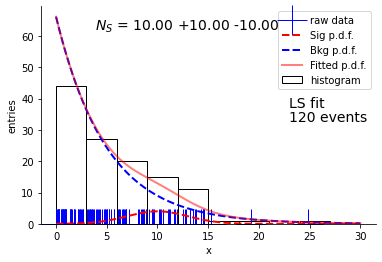

In [10]:
# fitted p.d.f.:
y = (fitted_mus/nhist*scales*gauss(x, mu, sigma)+(nhist-fitted_mus)/nhist*scaleb*decay(x, tau))
ys = (fitted_mus/nhist*scales*gauss(x, mu, sigma))
yb = ((nhist-fitted_mus)/nhist*scaleb*decay(x, tau))

fig, ax = plt.subplots()

ax.plot(rndy, np.zeros(rndy.shape), 'b+', ms=30, label="raw data")  # rug plot
ax.hist(rndy, bins=nbins, range=(0.0, xrange), fill=False, color='green', label="histogram")  # histogram

ax.plot(x, nhist*xrange*(1/nbins)*ys, 'r', linewidth=2, linestyle='--', label="Sig p.d.f.")
ax.plot(x, nhist*xrange*(1/nbins)*yb, 'b', linewidth=2, linestyle='--', label="Bkg p.d.f.")
ax.plot(x, nhist*xrange*(1/nbins)*y, 'r', alpha=0.5, linewidth=2, linestyle='-', label="Fitted p.d.f.")
#ax.set_ylim(bottom=0)

fig.text(0.70, 0.53, 'LS fit', fontsize=14)
fig.text(0.70, 0.48, '%d events'%nhist, fontsize=14)
fig.text(0.25, 0.80, '$N_S$ = %2.2f +%2.2f -%2.2f'%(fitted_mus,sigma_pos-fitted_mus,fitted_mus-sigma_neg), fontsize=14)
#fig.text(0.25, 0.80, '$N_S$ = %2.2f'%(fitted_mus), fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.legend(loc=1, fontsize=10)

ax.set_xlabel('x')
ax.set_ylabel('entries')

plt.show()